在cuda:0上训练
Epoch:1, 训练损失:1.729, 训练准确率:0.366, 测试准确率:0.646
Epoch:2, 训练损失:0.827, 训练准确率:0.690, 测试准确率:0.699
Epoch:3, 训练损失:0.668, 训练准确率:0.752, 测试准确率:0.777
Epoch:4, 训练损失:0.585, 训练准确率:0.781, 测试准确率:0.788
Epoch:5, 训练损失:0.532, 训练准确率:0.801, 测试准确率:0.794
Epoch:6, 训练损失:0.494, 训练准确率:0.817, 测试准确率:0.831
Epoch:7, 训练损失:0.463, 训练准确率:0.830, 测试准确率:0.841
Epoch:8, 训练损失:0.437, 训练准确率:0.840, 测试准确率:0.847
Epoch:9, 训练损失:0.417, 训练准确率:0.846, 测试准确率:0.848
Epoch:10, 训练损失:0.400, 训练准确率:0.854, 测试准确率:0.859
Epoch:11, 训练损失:0.389, 训练准确率:0.857, 测试准确率:0.852
Epoch:12, 训练损失:0.369, 训练准确率:0.865, 测试准确率:0.838
Epoch:13, 训练损失:0.365, 训练准确率:0.867, 测试准确率:0.871
Epoch:14, 训练损失:0.352, 训练准确率:0.871, 测试准确率:0.869
Epoch:15, 训练损失:0.345, 训练准确率:0.874, 测试准确率:0.873
Epoch:16, 训练损失:0.336, 训练准确率:0.877, 测试准确率:0.871
Epoch:17, 训练损失:0.328, 训练准确率:0.881, 测试准确率:0.880
Epoch:18, 训练损失:0.319, 训练准确率:0.882, 测试准确率:0.879
Epoch:19, 训练损失:0.315, 训练准确率:0.884, 测试准确率:0.868
Epoch:20, 训练损失:0.307, 训练准确率:0.887, 测试准确率:0.887
Epoch:21, 训练损失:0.305, 训练准确率:0.889, 测试准确率:0.887
Epoch:22, 训

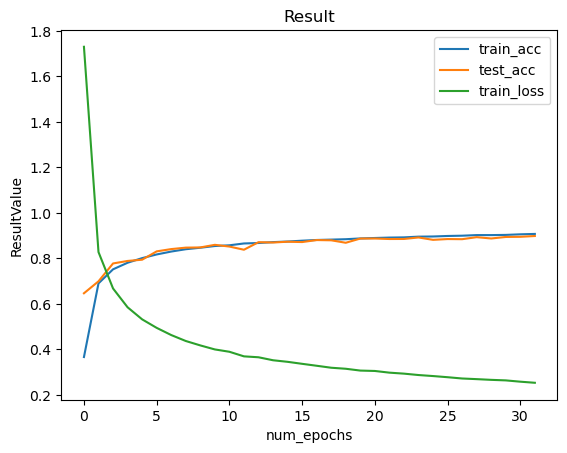

RuntimeError: shape '[28, 28]' is invalid for input of size 50176

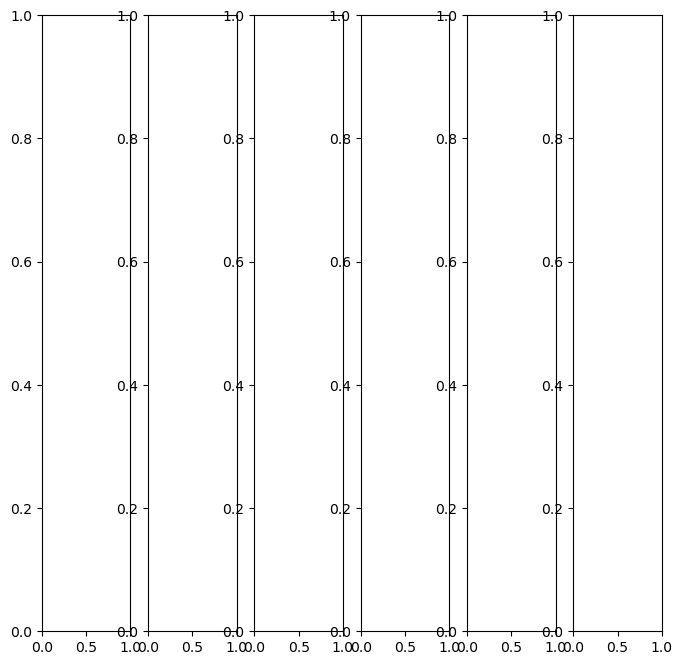

In [1]:
import st_train
from torch import nn
# AlexNet是更为复杂的现代卷积神经网络
AlexNet = nn.Sequential(
# 这里使用一个11*11的更大窗口来捕捉对象。同时，步幅为4，以减少输出的高度和宽度。另外，输出通道的数目远大于LeNet
nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
# 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
# 使用三个连续的卷积层和较小的卷积窗口。
# 除了最后的卷积层，输出通道的数量进一步增加。
# 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
nn.Flatten(),
# 这里全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
nn.Linear(6400, 4096), nn.ReLU(),
nn.Dropout(p=0.5),
nn.Linear(4096, 4096), nn.ReLU(),
nn.Dropout(p=0.5),
# 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
nn.Linear(4096, 10))
# 与LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵
batch_size = 256
learning_rate = 0.01
num_epochs = 32
train_iter, test_iter = st_train.load_MINST_data(batch_size, num_workers=16, resize=(224,224)) # 由于使用的是Fashion-MINST数据集, 进行缩放
result = st_train.ResVisualization(('train_acc','test_acc','train_loss'), num_epochs)
st_train.train_gpu(AlexNet, train_iter, test_iter, num_epochs, learning_rate, st_train.try_gpu(), result)
result.plot_res()